<a href="https://colab.research.google.com/github/Meghashyamt/Telecom-Project/blob/master/Telecom_AllAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
#Cloning Project From M Github
!git clone https://github.com/Meghashyamt/Telecom-Project

fatal: destination path 'Telecom-Project' already exists and is not an empty directory.


In [0]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import scale, LabelEncoder, StandardScaler

#ANN Keras Import
import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [148]:
#Import Data
data = pd.read_csv("Telecom-Project/telecom_churn_data.csv")
data.head(2)

,State,Account Length,Area code,Phone,International Plan,Vmail plan,Vmail Message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,Custserve calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [0]:
#Drop Phone Column
data.drop("Phone", axis=1, inplace=True)

In [150]:
#Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
State                   4617 non-null object
Account Length          4617 non-null int64
Area code               4617 non-null int64
International Plan      4617 non-null object
Vmail plan              4617 non-null object
Vmail Message           4617 non-null int64
Day mins                4617 non-null float64
Day calls               4617 non-null int64
Day charge              4617 non-null float64
Eve mins                4617 non-null float64
Eve calls               4617 non-null int64
Eve charge              4617 non-null float64
Night mins              4617 non-null float64
Night calls             4617 non-null int64
Night charge            4617 non-null float64
International mins      4617 non-null float64
International calls     4617 non-null int64
International charge    4617 non-null float64
Custserve calls         4617 non-null int64
Churn                   4617 non-null 

In [0]:
#Adding new Column
data['ChurnFlag']=(data['Churn']==True).astype(int)

In [0]:
#Slicing the data
X= data.iloc[:,1:19]
y= data.iloc[:,20]

In [0]:
X=pd.get_dummies(X,drop_first=True)

In [154]:
X.head(2)

,Account Length,Area code,Vmail Message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,Custserve calls,International Plan_ yes,Vmail plan_ yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0,1


In [0]:
# Use Dictornary for All Algorithms in one Line
classifiers={'Support Vector Machine'      : SVC(),
             'Decision Tree'               : DecisionTreeClassifier(),    
             'XGBoost'                     : XGBClassifier(),
             'Random Forest'               : RandomForestClassifier(),
             'Logistic Regression'         : LogisticRegression()}

In [0]:
#X= data.iloc[:,1:19].values
#y= data.iloc[:,20].values

In [0]:
#Train and test
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=10)

In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [159]:
#For looping for All Model in one Line
print('\033[1m'+"Model\t\t\t\t\t\tAccuracy\n")
for name,model in classifiers.items():
    model=model
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    print("{} :\t\t {}".format(name,score))

Model						Accuracy

Support Vector Machine :		 0.8658008658008658
Decision Tree :		 0.9206349206349206
XGBoost :		 0.9552669552669553
Random Forest :		 0.9458874458874459
Logistic Regression :		 0.8585858585858586


In [0]:
#from sklearn.model_selection import GridSearchCV

In [0]:
#Grid Search  to find the value from kernel , c , gamma
#parameters=[{'kernel':['linear'], 'C':[1,10,100,1000,10000]},
#           {'kernel':['rbf'],'gamma':[0.5, 0.1, 0.05,0.07,0.08], 'C':[1,10,100,1000,10000]}]

In [0]:
#grid_model_svc= GridSearchCV(SVC(), parameters)
#grid_model_svc.fit(X_train, y_train)
#grid_model_svc.best_score_

In [0]:
#grid_model_svc.best_params_

In [0]:
#Model ANN
clf = Sequential()

In [0]:
sc = StandardScaler()

In [0]:
#Transforming
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [171]:
#Hidden layers , input, units
clf.add(Dense(units=6, activation='relu', input_dim=18))
clf.add(Dropout(0.2))
clf.add(Dense(units=9, activation='relu'))
clf.add(Dropout(0.2))
#clf.add(Dense(units=6, activation='relu'))
clf.add(Dense(units= 1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#compiling
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [173]:
#Fit the model
m=clf.fit(X_train,y_train, batch_size=32, epochs=100, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 2907 samples, validate on 324 samples
Epoch 1/100
2907/2907 [==============================] - 1s 313us/step - loss: 0.6316 - acc: 0.7138 - val_loss: 0.5142 - val_acc: 0.8364
Epoch 2/100
2907/2907 [==============================] - 0s 50us/step - loss: 0.5128 - acc: 0.8500 - val_loss: 0.4462 - val_acc: 0.8364
Epoch 3/100
2907/2907 [==============================] - 0s 46us/step - loss: 0.4609 - acc: 0.8507 - val_loss: 0.4127 - val_acc: 0.8364
Epoch 4/100
2907/2907 [==============================] - 0s 48us/step - loss: 0.4399 - acc: 0.8545 - val_loss: 0.3979 - val_acc: 0.8364
Epoch 5/100
2907/2907 [==============================] - 0s 47us/step - loss: 0.4126 - acc: 0.8566 - val_loss: 0.3879 - val_acc: 0.8364
Epoch 6/100
2907/2907 [==============================] - 0s 46us/step - loss: 0.4055 - acc: 0.8566 - val_loss: 0.3811 - val_acc: 0.8364
Epoch 7/100
2907/2907 [==============================] - 0s 50us/step - loss: 0.3940 - a

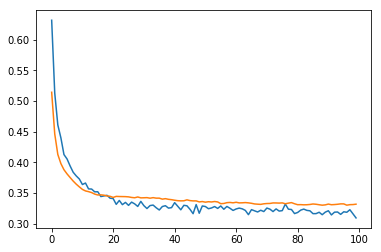

In [174]:
#Plotting
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])

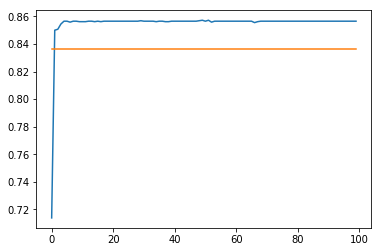

In [175]:
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])

In [176]:
#Evaluating
score= clf.evaluate(X_test, y_test)


1386/1386 [==============================] - 0s 22us/step


In [177]:
score

[0.31091051476686377, 0.8658008658008658]

In [178]:
#ML Deployment
from sklearn.externals import joblib
joblib.dump(clf,'TelecomProject.ml')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['TelecomProject.ml']